<a href="https://colab.research.google.com/github/abhisheksaik/HouseRentPred/blob/main/HouseRentPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Rent Price Prediction

Dataset : https://www.kaggle.com/saisaathvik/house-rent-prices-of-metropolitan-cities-in-india

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data=pd.read_csv("/content/Hyderabad_rent_modified1.csv")
data.head()


,seller_type,No.of_bedrooms,layout_type,property_type,locality,price,Area(sq.ft),furnish_type,No.of_bathrooms
0,OWNER,1,RK,Studio Apartment,Serilingampally,"6,720",320,Furnished,1
1,OWNER,5,BHK,Villa,Sri Nagar Colony,"36,000",3000,Semi-Furnished,4
2,OWNER,2,BHK,Independent House,Shaikpet,"11,000",900,Semi-Furnished,2
3,OWNER,3,BHK,Apartment,Nanakramguda,"45,000",2165,Unfurnished,3
4,OWNER,3,BHK,Apartment,Locality_Kondapur,"20,000",1600,Semi-Furnished,3


In [29]:
data.dtypes


seller_type        object
No.of_bedrooms      int64
layout_type        object
property_type      object
locality           object
price              object
Area(sq.ft)         int64
furnish_type       object
No.of_bathrooms     int64
dtype: object

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886 entries, 0 to 5885
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   seller_type      5886 non-null   object
 1   No.of_bedrooms   5886 non-null   int64 
 2   layout_type      5886 non-null   object
 3   property_type    5886 non-null   object
 4   locality         5886 non-null   object
 5   price            5886 non-null   object
 6   Area(sq.ft)      5886 non-null   int64 
 7   furnish_type     5886 non-null   object
 8   No.of_bathrooms  5886 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 414.0+ KB


In [31]:
data["price"]=data["price"].str.replace(",","")

In [ ]:
data.info()

In [37]:
data["price"]=data["price"].astype(int)

In [33]:
data['No.of_bathrooms']=data['No.of_bathrooms'].astype(int)

In [ ]:
data.info()

In [40]:
data['locality'].value_counts()

Locality_Kondapur         640
Locality_Madhapur         270
Locality_Kukatpally       204
Locality_Gachibowli       198
Locality_Manikonda        174
                         ... 
Jalapalli                   1
Saptagiri Colony            1
Patel Guda                  1
Czech Colony Hyderabad      1
Umdanagar                   1
Name: locality, Length: 487, dtype: int64

In [44]:
data["property_type"].value_counts()

Apartment            3719
Independent House    1054
Independent Floor     708
Studio Apartment      259
Villa                 134
Penthouse              12
Name: property_type, dtype: int64

In [45]:
data.duplicated().sum()

0

In [46]:
data=data.drop_duplicates(keep="first")

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5886 entries, 0 to 5885
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   seller_type      5886 non-null   object
 1   No.of_bedrooms   5886 non-null   int64 
 2   layout_type      5886 non-null   object
 3   property_type    5886 non-null   object
 4   locality         5886 non-null   object
 5   price            5886 non-null   int64 
 6   Area(sq.ft)      5886 non-null   int64 
 7   furnish_type     5886 non-null   object
 8   No.of_bathrooms  5886 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 459.8+ KB


In [49]:
data["price"].describe()

count      5886.000000
mean      19294.184336
std       23272.546626
min        1500.000000
25%        9500.000000
50%       15000.000000
75%       22000.000000
max      600000.000000
Name: price, dtype: float64

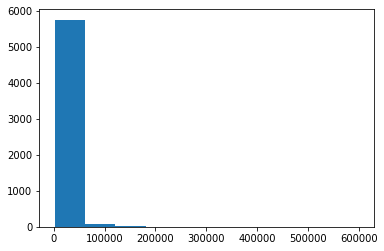

In [54]:
plt.hist(data["price"])
plt.show()

In [58]:
quantile1=data["price"].quantile(0.25)
quantile3=data["price"].quantile(0.75)
quantile1,quantile3

(9500.0, 22000.0)

In [60]:
iqr=quantile3-quantile1
iqr

12500.0

In [62]:
upper_limit=quantile3+1.5*iqr
lower_limit=quantile1-1.5*iqr
upper_limit,lower_limit

(40750.0, -9250.0)

In [63]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    elif value < lower_limit:
        return lower_limit
    else:
        return value

In [64]:
data['price']=data['price'].apply(limit_imputer)

In [65]:
data['price'].describe()

count     5886.000000
mean     17043.370880
std       9714.201039
min       1500.000000
25%       9500.000000
50%      15000.000000
75%      22000.000000
max      40750.000000
Name: price, dtype: float64

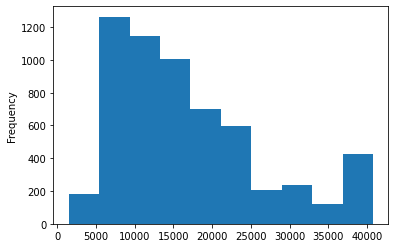

In [66]:
data['price'].plot.hist()

In [68]:
data.isnull().sum()

seller_type        0
No.of_bedrooms     0
layout_type        0
property_type      0
locality           0
price              0
Area(sq.ft)        0
furnish_type       0
No.of_bathrooms    0
dtype: int64

In [70]:
data.shape

(5886, 9)

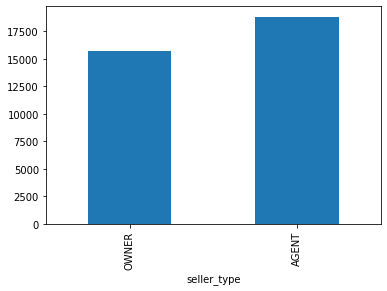

In [73]:
data.groupby('seller_type')['price'].mean().sort_values().plot(kind='bar')

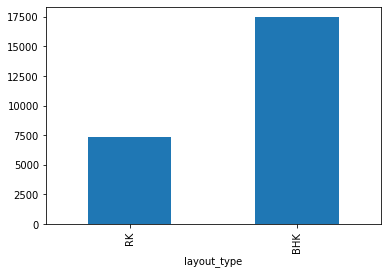

In [74]:
data.groupby('layout_type')['price'].mean().sort_values().plot(kind='bar')

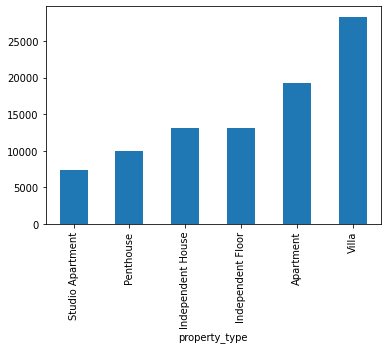

In [75]:

data.groupby('property_type')['price'].mean().sort_values().plot(kind='bar')

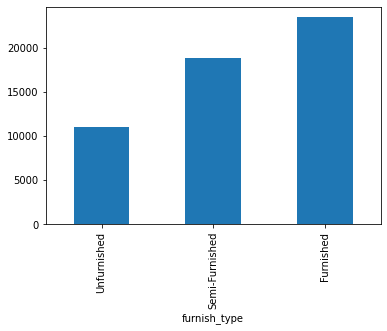

In [76]:
data.groupby('furnish_type')['price'].mean().sort_values().plot(kind='bar')

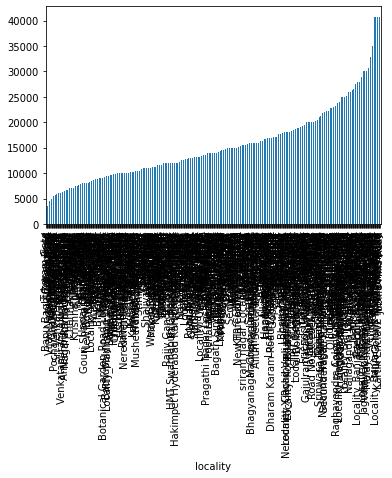

In [77]:
data.groupby('locality')['price'].mean().sort_values().plot(kind='bar')

In [78]:
data.dropna(inplace=True)
X = data.drop(columns=['price'])
Y = data['price']

In [79]:
#checking distribution of independent numerical variables
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

In [80]:
numerical_columns = ['No.of_bedrooms','Area(sq.ft)','No.of_bathrooms']

In [88]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])


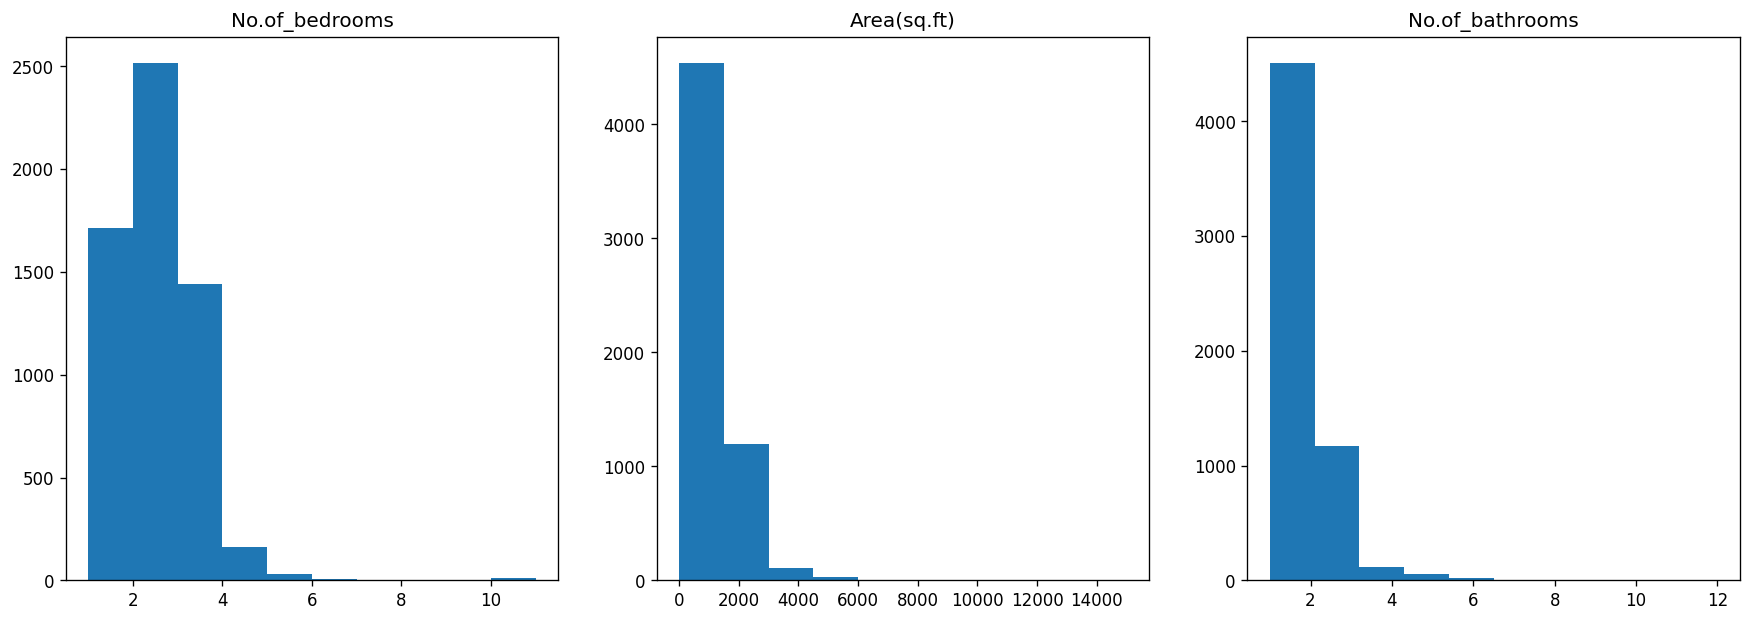

In [83]:
distribution(X, numerical_columns)

In [89]:
#removing right skew
def right_skew(x):
  return np.log(abs(x+500))
right_skew_variables = ['No.of_bedrooms','Area(sq.ft)','No.of_bathrooms']

In [91]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

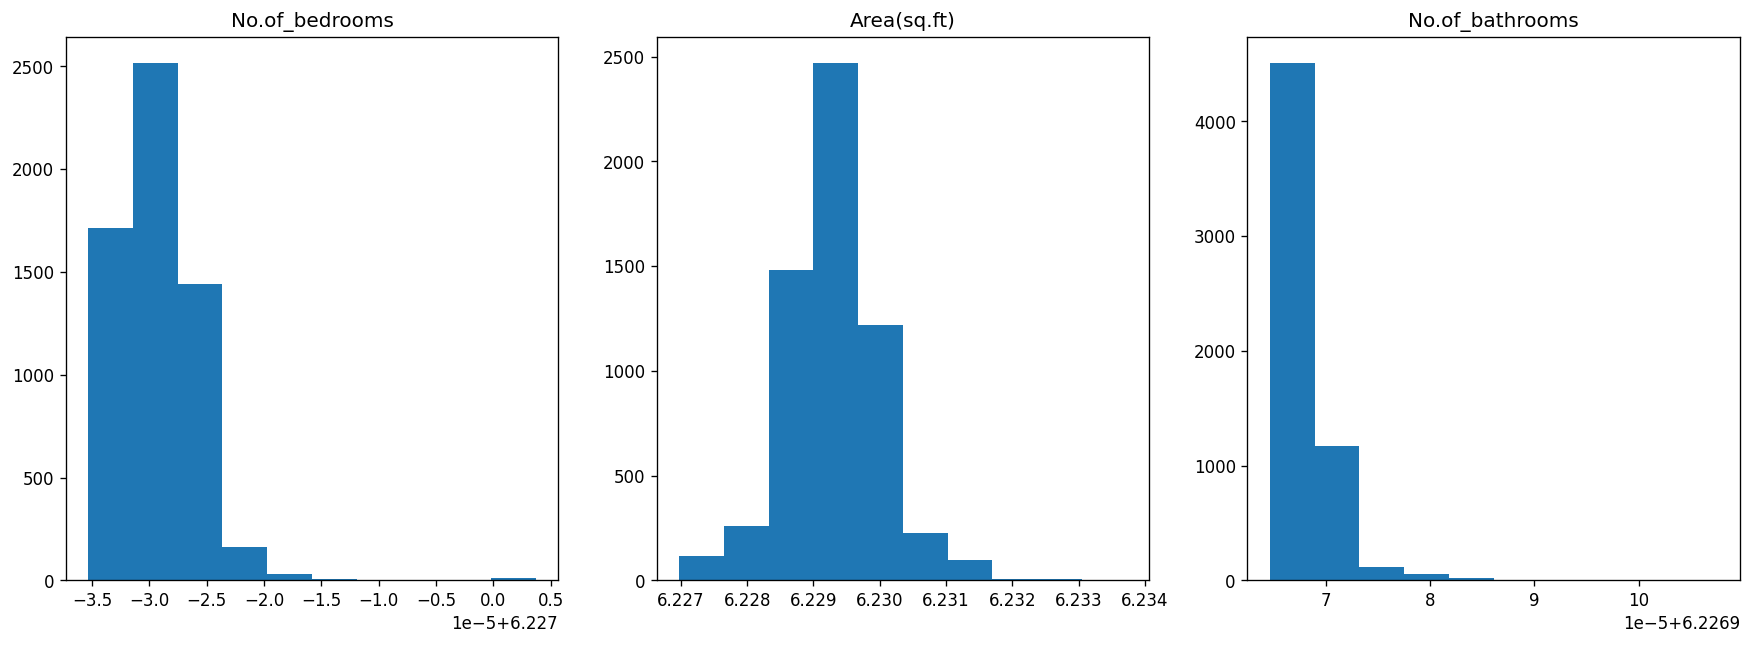

In [92]:
distribution(X, numerical_columns)

#Scaling


In [94]:
X

,seller_type,No.of_bedrooms,layout_type,property_type,locality,Area(sq.ft),furnish_type,No.of_bathrooms
0,OWNER,6.226965,RK,Studio Apartment,Serilingampally,6.227937,Furnished,6.226965
1,OWNER,6.226980,BHK,Villa,Sri Nagar Colony,6.230797,Semi-Furnished,6.226976
2,OWNER,6.226969,BHK,Independent House,Shaikpet,6.228993,Semi-Furnished,6.226969
3,OWNER,6.226973,BHK,Apartment,Nanakramguda,6.230261,Unfurnished,6.226973
4,OWNER,6.226973,BHK,Apartment,Locality_Kondapur,6.229792,Semi-Furnished,6.226973
...,...,...,...,...,...,...,...,...
5881,AGENT,6.226965,BHK,Apartment,Locality_Begumpet,6.228921,Semi-Furnished,6.226965
5882,AGENT,6.226969,BHK,Apartment,Locality_Ameerpet,6.229488,Semi-Furnished,6.226969
5883,AGENT,6.226969,BHK,Apartment,Locality_Ameerpet,6.229375,Semi-Furnished,6.226969
5884,AGENT,6.226969,BHK,Apartment,Locality_Begumpet,6.229488,Furnished,6.226969


In [95]:
data['seller_type'].value_counts()

OWNER    3381
AGENT    2505
Name: seller_type, dtype: int64

In [96]:
#converting the categorical variables to numerical data


X["seller_type"] = X["seller_type"].map({    'OWNER':1,
                                               'AGENT':0
})

X['layout_type'] = X['layout_type'].map({
    'RK':0,
    'BHK':1
})

X['furnish_type'] = X['furnish_type'].map({'Unfurnished':1,
                                            'Semi-Furnished':2,
                                            'Furnished':3
                                                                     
})

X.head()


,seller_type,No.of_bedrooms,layout_type,property_type,locality,Area(sq.ft),furnish_type,No.of_bathrooms
0,1,6.226965,0,Studio Apartment,Serilingampally,6.227937,3,6.226965
1,1,6.226980,1,Villa,Sri Nagar Colony,6.230797,2,6.226976
2,1,6.226969,1,Independent House,Shaikpet,6.228993,2,6.226969
3,1,6.226973,1,Apartment,Nanakramguda,6.230261,1,6.226973
4,1,6.226973,1,Apartment,Locality_Kondapur,6.229792,2,6.226973


In [99]:
df1=pd.get_dummies(data['property_type'], prefix='property_type')
df1

,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
5881,1,0,0,0,0,0
5882,1,0,0,0,0,0
5883,1,0,0,0,0,0
5884,1,0,0,0,0,0


In [100]:

X=pd.concat([X,df1],axis=1)
X.head()

,seller_type,No.of_bedrooms,layout_type,property_type,locality,Area(sq.ft),furnish_type,No.of_bathrooms,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa
0,1,6.226965,0,Studio Apartment,Serilingampally,6.227937,3,6.226965,0,0,0,0,1,0
1,1,6.226980,1,Villa,Sri Nagar Colony,6.230797,2,6.226976,0,0,0,0,0,1
2,1,6.226969,1,Independent House,Shaikpet,6.228993,2,6.226969,0,0,1,0,0,0
3,1,6.226973,1,Apartment,Nanakramguda,6.230261,1,6.226973,1,0,0,0,0,0
4,1,6.226973,1,Apartment,Locality_Kondapur,6.229792,2,6.226973,1,0,0,0,0,0


In [101]:
X.drop(columns=['property_type'])

,seller_type,No.of_bedrooms,layout_type,locality,Area(sq.ft),furnish_type,No.of_bathrooms,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa
0,1,6.226965,0,Serilingampally,6.227937,3,6.226965,0,0,0,0,1,0
1,1,6.226980,1,Sri Nagar Colony,6.230797,2,6.226976,0,0,0,0,0,1
2,1,6.226969,1,Shaikpet,6.228993,2,6.226969,0,0,1,0,0,0
3,1,6.226973,1,Nanakramguda,6.230261,1,6.226973,1,0,0,0,0,0
4,1,6.226973,1,Locality_Kondapur,6.229792,2,6.226973,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,0,6.226965,1,Locality_Begumpet,6.228921,2,6.226965,1,0,0,0,0,0
5882,0,6.226969,1,Locality_Ameerpet,6.229488,2,6.226969,1,0,0,0,0,0
5883,0,6.226969,1,Locality_Ameerpet,6.229375,2,6.226969,1,0,0,0,0,0
5884,0,6.226969,1,Locality_Begumpet,6.229488,3,6.226969,1,0,0,0,0,0


In [102]:
len(X['locality'].unique())

487

In [103]:
#let us find the top 13 most frequent categories of locality
data.locality.value_counts().sort_values(ascending=False).head(20)

Locality_Kondapur                  640
Locality_Madhapur                  270
Locality_Kukatpally                204
Locality_Gachibowli                198
Locality_Manikonda                 174
Locality_Begumpet                  167
Locality_Ameerpet                  120
Locality_Miyapur                   118
Locality_Nallakunta                104
Locality_Hitech City                98
Locality_Chandanagar                95
Locality_Anjaiah Nagar              91
Locality_Banjara Hills              89
Serilingampally                     71
Nizampet                            71
Somajiguda                          69
Mehdipatnam                         63
Nallagandla Locality_Gachibowli     61
Amberpet                            54
Bandlaguda Jagir                    54
Name: locality, dtype: int64

In [105]:
#let us create a list and store the most frequent categories of locality
top_13=[i for i in data.locality.value_counts().sort_values(ascending=False).head(13).index]
top_13

['Locality_Kondapur',
 'Locality_Madhapur',
 'Locality_Kukatpally',
 'Locality_Gachibowli',
 'Locality_Manikonda',
 'Locality_Begumpet',
 'Locality_Ameerpet',
 'Locality_Miyapur',
 'Locality_Nallakunta',
 'Locality_Hitech City',
 'Locality_Chandanagar',
 'Locality_Anjaiah Nagar',
 'Locality_Banjara Hills']

In [106]:
for label in top_13:
    X[label]=np.where(X['locality']==label ,1, 0)
X.head()

,seller_type,No.of_bedrooms,layout_type,property_type,locality,Area(sq.ft),furnish_type,No.of_bathrooms,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,Locality_Kondapur,Locality_Madhapur,Locality_Kukatpally,Locality_Gachibowli,Locality_Manikonda,Locality_Begumpet,Locality_Ameerpet,Locality_Miyapur,Locality_Nallakunta,Locality_Hitech City,Locality_Chandanagar,Locality_Anjaiah Nagar,Locality_Banjara Hills
0,1,6.226965,0,Studio Apartment,Serilingampally,6.227937,3,6.226965,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,6.226980,1,Villa,Sri Nagar Colony,6.230797,2,6.226976,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,6.226969,1,Independent House,Shaikpet,6.228993,2,6.226969,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,6.226973,1,Apartment,Nanakramguda,6.230261,1,6.226973,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,6.226973,1,Apartment,Locality_Kondapur,6.229792,2,6.226973,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
X.drop(columns=['locality','property_type'],inplace=True)

In [108]:
X.columns

Index(['seller_type', 'No.of_bedrooms', 'layout_type', 'Area(sq.ft)',
       'furnish_type', 'No.of_bathrooms', 'property_type_Apartment',
       'property_type_Independent Floor', 'property_type_Independent House',
       'property_type_Penthouse', 'property_type_Studio Apartment',
       'property_type_Villa', 'Locality_Kondapur', 'Locality_Madhapur',
       'Locality_Kukatpally', 'Locality_Gachibowli', 'Locality_Manikonda',
       'Locality_Begumpet', 'Locality_Ameerpet', 'Locality_Miyapur',
       'Locality_Nallakunta', 'Locality_Hitech City', 'Locality_Chandanagar',
       'Locality_Anjaiah Nagar', 'Locality_Banjara Hills'],
      dtype='object')

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,seller_type,No.of_bedrooms,layout_type,Area(sq.ft),furnish_type,No.of_bathrooms,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,Locality_Kondapur,Locality_Madhapur,Locality_Kukatpally,Locality_Gachibowli,Locality_Manikonda,Locality_Begumpet,Locality_Ameerpet,Locality_Miyapur,Locality_Nallakunta,Locality_Hitech City,Locality_Chandanagar,Locality_Anjaiah Nagar,Locality_Banjara Hills
0,0.860758,-1.141423,-4.661102,-1.881776,1.818553,-1.107436,-1.310037,-0.369773,-0.467043,-0.045198,4.661102,-0.152631,-0.349282,-0.219265,-0.18948,-0.186575,-0.174534,-0.170883,-0.144262,-0.14303,-0.134115,-0.130121,-0.128081,-0.125312,-0.123906
1,0.860758,3.210453,0.214542,2.122284,0.264997,2.242775,-1.310037,-0.369773,-0.467043,-0.045198,-0.214542,6.551746,-0.349282,-0.219265,-0.18948,-0.186575,-0.174534,-0.170883,-0.144262,-0.14303,-0.134115,-0.130121,-0.128081,-0.125312,-0.123906
2,0.860758,-0.050199,0.214542,-0.404531,0.264997,0.011529,-1.310037,-0.369773,2.141131,-0.045198,-0.214542,-0.152631,-0.349282,-0.219265,-0.18948,-0.186575,-0.174534,-0.170883,-0.144262,-0.14303,-0.134115,-0.130121,-0.128081,-0.125312,-0.123906
3,0.860758,1.038850,0.214542,1.371137,-1.288560,1.128263,0.763337,-0.369773,-0.467043,-0.045198,-0.214542,-0.152631,-0.349282,-0.219265,-0.18948,-0.186575,-0.174534,-0.170883,-0.144262,-0.14303,-0.134115,-0.130121,-0.128081,-0.125312,-0.123906
4,0.860758,1.038850,0.214542,0.714165,0.264997,1.128263,0.763337,-0.369773,-0.467043,-0.045198,-0.214542,-0.152631,2.863019,-0.219265,-0.18948,-0.186575,-0.174534,-0.170883,-0.144262,-0.14303,-0.134115,-0.130121,-0.128081,-0.125312,-0.123906


In [111]:
X.corr()

,seller_type,No.of_bedrooms,layout_type,Area(sq.ft),furnish_type,No.of_bathrooms,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,Locality_Kondapur,Locality_Madhapur,Locality_Kukatpally,Locality_Gachibowli,Locality_Manikonda,Locality_Begumpet,Locality_Ameerpet,Locality_Miyapur,Locality_Nallakunta,Locality_Hitech City,Locality_Chandanagar,Locality_Anjaiah Nagar,Locality_Banjara Hills
seller_type,1.000000,0.043688,-0.052316,0.016340,-0.072221,0.048597,-0.342861,0.161950,0.244278,0.031287,0.052316,0.046140,-0.261186,-0.152901,0.050383,0.004319,0.077197,-0.138509,-0.121402,0.069181,-0.101039,-0.067922,0.055711,-0.145584,0.002470
No.of_bedrooms,0.043688,1.000000,0.244883,0.813844,0.266144,0.853239,0.126026,-0.064462,-0.054431,-0.018718,-0.244883,0.215380,-0.014272,-0.026313,0.007577,0.060245,0.064282,-0.064484,-0.074188,0.021811,-0.040545,0.085914,0.028783,-0.109978,0.030008
layout_type,-0.052316,0.244883,1.000000,0.321968,0.105294,0.227395,0.281057,0.079332,0.100200,0.009697,-1.000000,0.032746,0.048326,-0.024229,-0.000106,0.003274,0.017882,-0.023207,-0.039387,0.018866,0.009911,0.008495,0.020905,-0.013400,-0.007356
Area(sq.ft),0.016340,0.813844,0.321968,1.000000,0.288011,0.788924,0.128198,-0.065297,-0.033106,-0.028278,-0.321968,0.264252,0.029676,0.008099,-0.009994,0.060476,0.061368,-0.070112,-0.071583,0.008646,-0.050662,0.096286,0.024530,-0.144033,0.040413
furnish_type,-0.072221,0.266144,0.105294,0.288011,1.000000,0.257358,0.237706,-0.112973,-0.171560,-0.028983,-0.105294,0.072299,0.068818,0.074506,-0.003179,0.107998,0.049368,-0.040559,-0.004727,0.002124,-0.008535,0.040670,0.012996,0.095248,0.019858
No.of_bathrooms,0.048597,0.853239,0.227395,0.788924,0.257358,1.000000,0.098013,-0.083559,-0.030802,-0.024767,-0.227395,0.264655,-0.023737,-0.008683,0.002054,0.050414,0.066855,-0.069067,-0.072358,0.016490,-0.038900,0.106605,0.022528,-0.107961,0.021473
property_type_Apartment,-0.342861,0.126026,0.281057,0.128198,0.237706,0.098013,1.000000,-0.484417,-0.611844,-0.059212,-0.281057,-0.199952,0.210042,0.073082,0.036792,0.052548,0.050039,0.066794,0.047806,0.046351,0.000772,0.066291,0.019499,0.038552,-0.000674
property_type_Independent Floor,0.161950,-0.064462,0.079332,-0.065297,-0.112973,-0.083559,-0.484417,1.000000,-0.172700,-0.016713,-0.079332,-0.056439,-0.090568,-0.066099,-0.010103,-0.028436,-0.039870,-0.044314,-0.027475,-0.030531,0.021765,-0.044034,-0.010059,0.012928,0.001261
property_type_Independent House,0.244278,-0.054431,0.100200,-0.033106,-0.171560,-0.030802,-0.611844,-0.172700,1.000000,-0.021110,-0.100200,-0.071285,-0.146049,-0.038864,-0.030355,-0.033070,-0.013494,-0.047784,-0.048564,-0.022541,-0.005459,-0.046920,-0.000041,-0.058526,0.003859
property_type_Penthouse,0.031287,-0.018718,0.009697,-0.028278,-0.028983,-0.024767,-0.059212,-0.016713,-0.021110,1.000000,-0.009697,-0.006899,-0.015787,-0.009910,-0.008564,-0.008433,-0.007889,-0.007724,-0.006520,-0.006465,-0.006062,-0.005881,-0.005789,-0.005664,-0.005600


In [112]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No.of_bedrooms', 'Area(sq.ft)'],
  ['No.of_bedrooms', 'No.of_bathrooms'],
  ['Area(sq.ft)', 'No.of_bedrooms'],
  ['Area(sq.ft)', 'No.of_bathrooms'],
  ['No.of_bathrooms', 'No.of_bedrooms'],
  ['No.of_bathrooms', 'Area(sq.ft)']],
 6)

In [113]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


seller_type                           1.370317
No.of_bedrooms                        4.626331
layout_type                                inf
Area(sq.ft)                           3.631175
furnish_type                          1.194961
No.of_bathrooms                       4.172360
property_type_Apartment                    inf
property_type_Independent Floor            inf
property_type_Independent House            inf
property_type_Penthouse                    inf
property_type_Studio Apartment             inf
property_type_Villa                5393.828062
Locality_Kondapur                     1.224470
Locality_Madhapur                     1.098673
Locality_Kukatpally                   1.030321
Locality_Gachibowli                   1.046676
Locality_Manikonda                    1.037183
Locality_Begumpet                     1.069088
Locality_Ameerpet                     1.054802
Locality_Miyapur                      1.024046
Locality_Nallakunta                   1.037994
Locality_Hite

In [114]:
#defining a function MC_remover to remove the multi collinearity between variables

def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [115]:

for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


layout_type has been removed


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


property_type_Apartment has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,seller_type,No.of_bedrooms,Area(sq.ft),furnish_type,No.of_bathrooms,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,Locality_Kondapur,Locality_Madhapur,Locality_Kukatpally,Locality_Gachibowli,Locality_Manikonda,Locality_Begumpet,Locality_Ameerpet,Locality_Miyapur,Locality_Nallakunta,Locality_Hitech City,Locality_Chandanagar,Locality_Anjaiah Nagar,Locality_Banjara Hills
0,0.860758,-1.141423,-1.881776,1.818553,-1.107436,-0.369773,-0.467043,-0.045198,4.661102,-0.152631,-0.349282,-0.219265,-0.18948,-0.186575,-0.174534,-0.170883,-0.144262,-0.14303,-0.134115,-0.130121,-0.128081,-0.125312,-0.123906
1,0.860758,3.210453,2.122284,0.264997,2.242775,-0.369773,-0.467043,-0.045198,-0.214542,6.551746,-0.349282,-0.219265,-0.18948,-0.186575,-0.174534,-0.170883,-0.144262,-0.14303,-0.134115,-0.130121,-0.128081,-0.125312,-0.123906
2,0.860758,-0.050199,-0.404531,0.264997,0.011529,-0.369773,2.141131,-0.045198,-0.214542,-0.152631,-0.349282,-0.219265,-0.18948,-0.186575,-0.174534,-0.170883,-0.144262,-0.14303,-0.134115,-0.130121,-0.128081,-0.125312,-0.123906
3,0.860758,1.038850,1.371137,-1.288560,1.128263,-0.369773,-0.467043,-0.045198,-0.214542,-0.152631,-0.349282,-0.219265,-0.18948,-0.186575,-0.174534,-0.170883,-0.144262,-0.14303,-0.134115,-0.130121,-0.128081,-0.125312,-0.123906
4,0.860758,1.038850,0.714165,0.264997,1.128263,-0.369773,-0.467043,-0.045198,-0.214542,-0.152631,2.863019,-0.219265,-0.18948,-0.186575,-0.174534,-0.170883,-0.144262,-0.14303,-0.134115,-0.130121,-0.128081,-0.125312,-0.123906


In [116]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(seller_type                        1.370317
 No.of_bedrooms                     4.630024
 Area(sq.ft)                        3.631175
 furnish_type                       1.194961
 No.of_bathrooms                    4.172360
 property_type_Independent Floor    1.176958
 property_type_Independent House    1.253689
 property_type_Penthouse            1.007331
 property_type_Studio Apartment     1.184670
 property_type_Villa                1.117693
 Locality_Kondapur                  1.224490
 Locality_Madhapur                  1.098677
 Locality_Kukatpally                1.030329
 Locality_Gachibowli                1.046676
 Locality_Manikonda                 1.037199
 Locality_Begumpet                  1.069088
 Locality_Ameerpet                  1.054802
 Locality_Miyapur                   1.024066
 Locality_Nallakunta                1.037998
 Locality_Hitech City               1.041534
 Locality_Chandanagar               1.015772
 Locality_Anjaiah Nagar             1.097951
 Locality_

In [117]:
X=vif_data[:]

In [118]:
Y=data["price"]

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4120, 23), (1766, 23), (4120,), (1766,))

In [120]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [125]:
lr.coef_

array([-1120.97980327,  2571.51817911,  3397.54164271,  1672.05694014,
        1227.51792576,  -599.0059936 ,  -992.72671321,   -38.36111436,
          24.64402149,  -114.57782083,   379.47486848,   772.38044267,
         380.91844681,   992.87605974,   489.02213702,   -50.24907537,
        -174.68073107,    21.86005716,  -196.43253253,   887.58329771,
          16.25392543,   267.01962533,   599.68744171])

In [126]:
predictions=lr.predict(x_test)

In [127]:
lr.score(x_test,y_test)

0.7342137740891936

Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

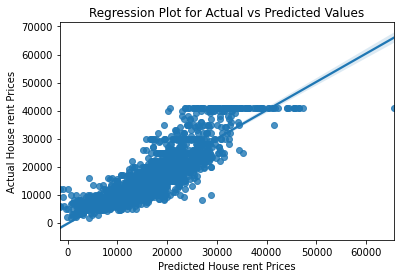

In [128]:
g = sns.regplot(x=lr.predict(x_test), y=y_test, fit_reg=True)
g.set(xlabel='Predicted House rent Prices', ylabel='Actual House rent Prices', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

In [129]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

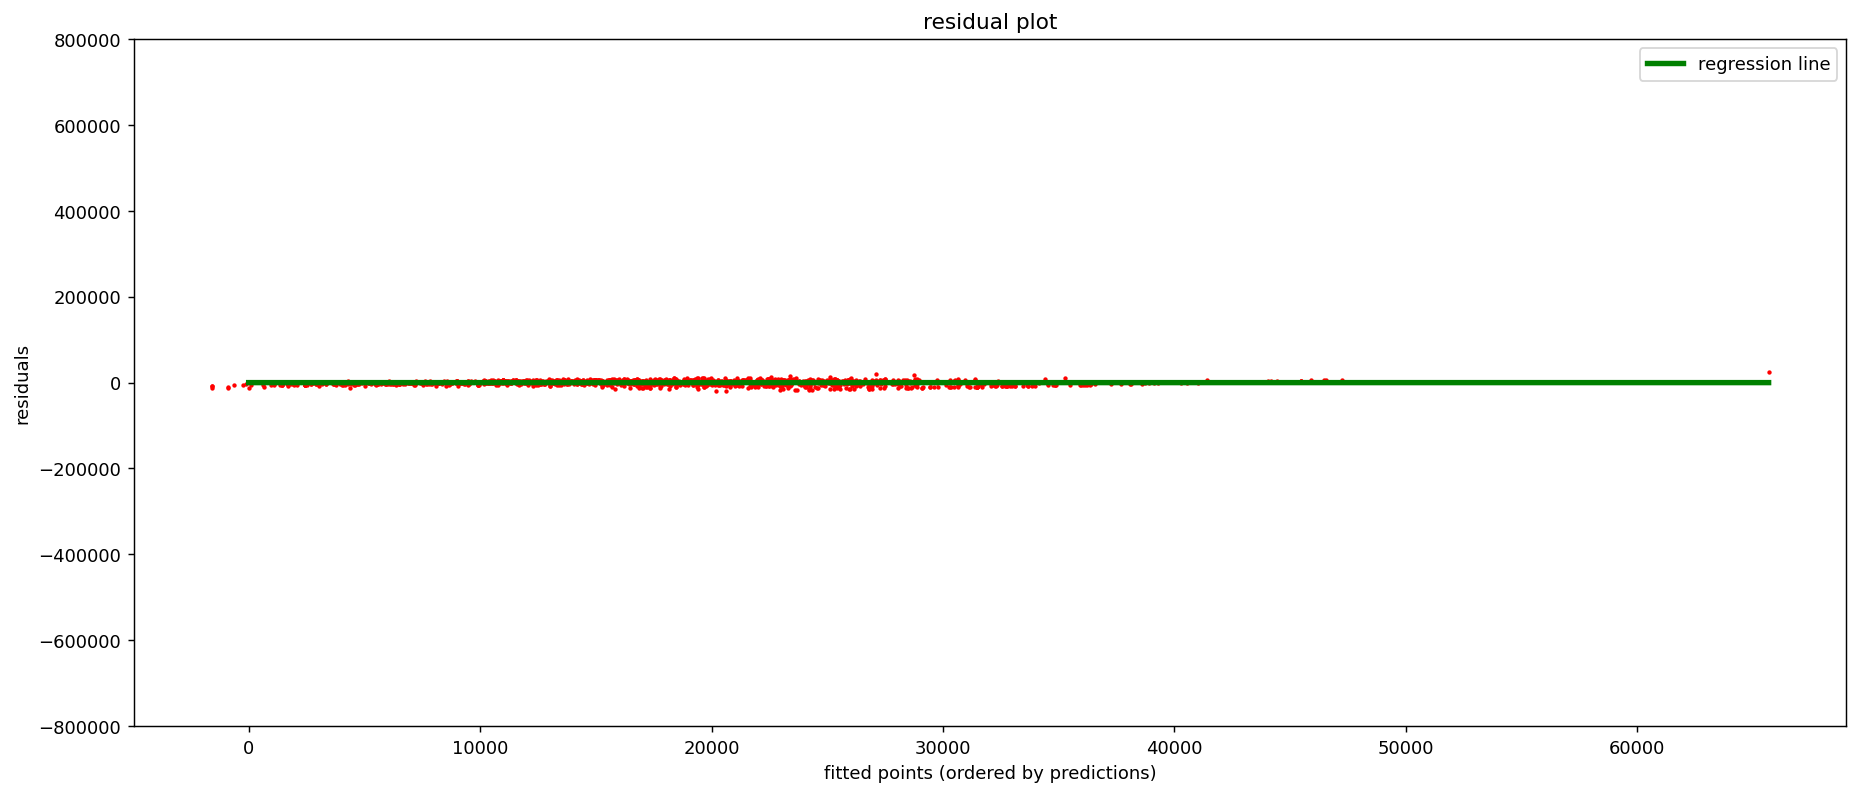

In [131]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

plt.figure(dpi = 130, figsize = (17,7))
plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

#Distribution of Errors

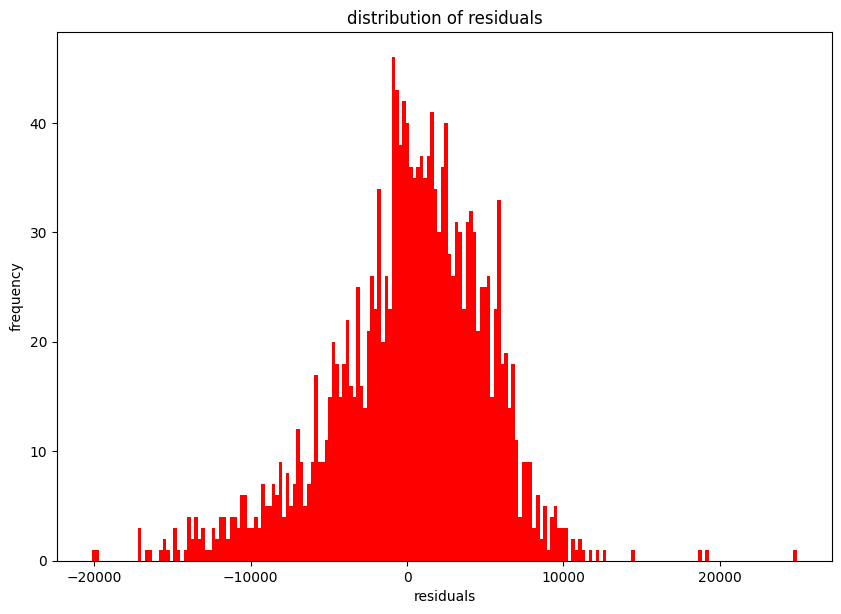

In [132]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

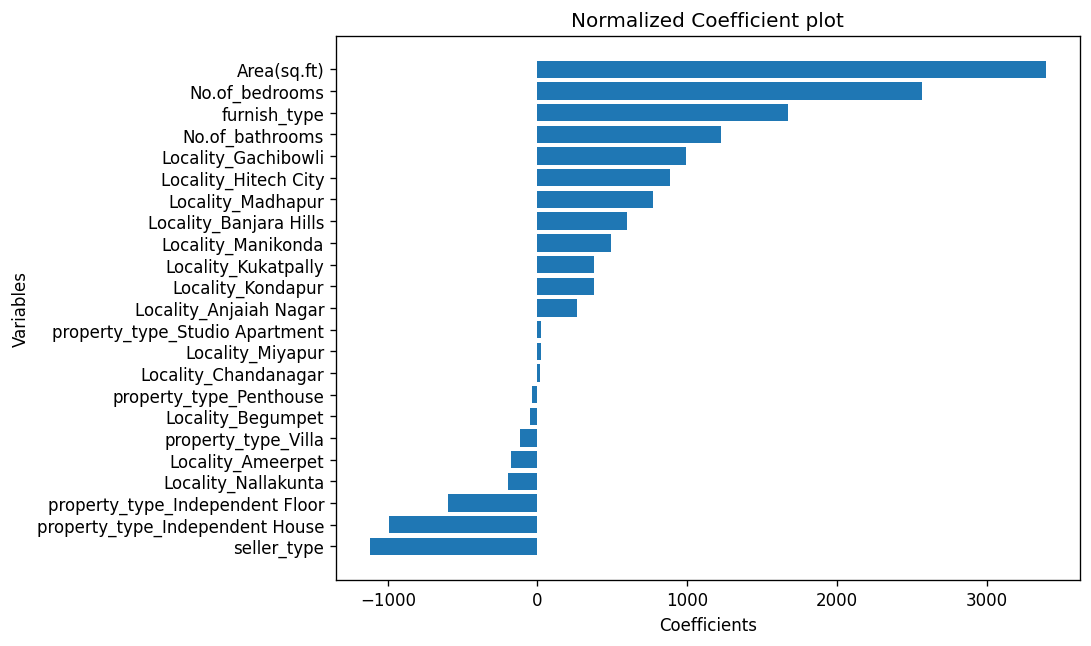

In [133]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')

plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()